In [4]:
!pip install -U gdown > /dev/null 2>&1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gdown

# Download and load data
file_id = '1F6b961eijthkGNWuA217IqlzwHM9k_4a'
url = f'https://drive.google.com/uc?id={file_id}'
file_path = 'data.csv'
gdown.download(url, file_path, quiet=False)
df = pd.read_csv(file_path)

# Converting to numpy and prepare data
data = df[['userId', 'movieId', 'rating', 'timestamp']].to_numpy()

Downloading...
From (original): https://drive.google.com/uc?id=1F6b961eijthkGNWuA217IqlzwHM9k_4a
From (redirected): https://drive.google.com/uc?id=1F6b961eijthkGNWuA217IqlzwHM9k_4a&confirm=t&uuid=a53cf457-b71e-4cf0-9793-8c9f93f1c2a2
To: /content/data.csv
100%|██████████| 877M/877M [00:08<00:00, 105MB/s]


In [5]:
# unique users and movies
user_ids = np.unique(data[:, 0])
movie_ids = np.unique(data[:, 1])

# Mapping from original IDs to sequential indices
uMer_id_to_idx = {user_id: idx for idx, user_id in enumerate(user_ids)}
movie_id_to_idx = {movie_id: idx for idx, movie_id in enumerate(movie_ids)}

# User and movie indexes
user_index = [[] for _ in range(len(user_ids))]
movie_index = [[] for _ in range(len(movie_ids))]

for row in data:
    user_id, movie_id, rating, timestamp = row
    user_idx = user_id_to_idx[user_id]
    movie_idx = movie_id_to_idx[movie_id]
    user_index[user_idx].append((movie_idx, rating, timestamp))
    movie_index[movie_idx].append((user_idx, rating, timestamp))

# Numpy arrays
user_index = [np.array(user_ratings) for user_ratings in user_index]
movie_index = [np.array(movie_ratings) for movie_ratings in movie_index]

print(f"Created indexes: {len(user_index)} users, {len(movie_index)} movies")
print(f"Sample - User 0: {len(user_index[0])} ratings, Movie 0: {len(movie_index[0])} ratings")

Created indexes: 200948 users, 84432 movies
Sample - User 0: 141 ratings, Movie 0: 68997 ratings


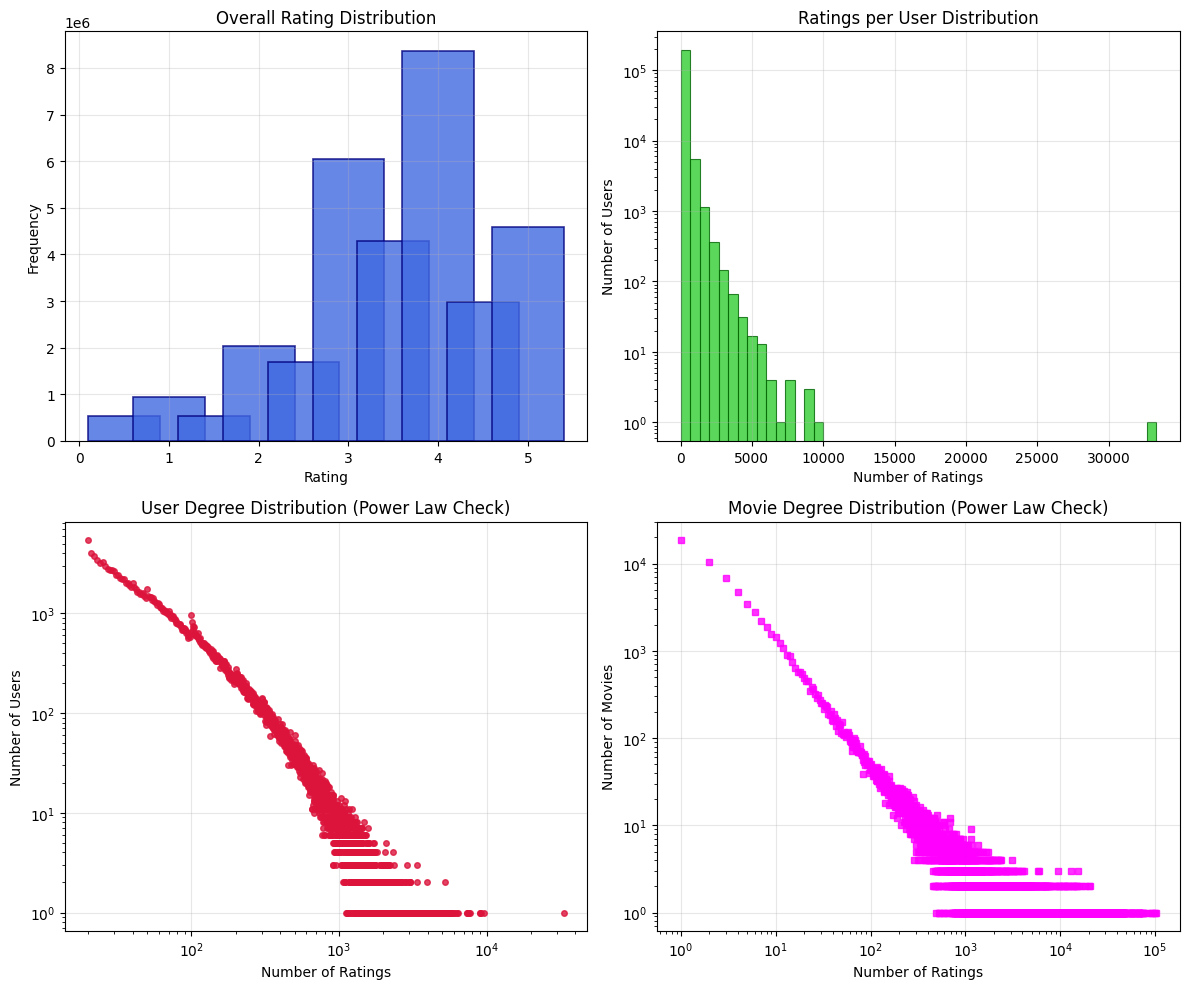

ANALYSIS SUMMARY
Dataset: 32,000,204 ratings, 200,948 users, 84,432 movies
Average rating: 3.54 +- 1.06
User activity: 159.2 +- 282.0 ratings
Movie popularity: 379.0 +- 2592.4 ratings
Power Law Analysis:
User Gini: 0.594, Movie Gini: 0.952
Moderate scale-free characteristics


In [6]:
# statistics
user_ratings_count = [len(u) for u in user_index]
movie_ratings_count = [len(m) for m in movie_index]
all_ratings = data[:, 2]

#  Overall Rating Distribution
fig, ax = plt.subplots(figsize=(8, 6))
unique_ratings, rating_counts = np.unique(all_ratings, return_counts=True)
ax.bar(unique_ratings, rating_counts, alpha=0.8, color='#4169E1', edgecolor='#000080', linewidth=1.2)
ax.set_title('Overall Rating Distribution')
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('overall_rating_distribution.pdf', dpi=300, bbox_inches='tight')
plt.close()

#Ratings per User Distribution
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(user_ratings_count, bins=50, alpha=0.8, color='#32CD32', edgecolor='#006400', linewidth=0.8)
ax.set_title('Ratings per User Distribution')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('ratings_per_user_distribution.pdf', dpi=300, bbox_inches='tight')
plt.close()

# User Degree Distribution (Power Law Check)
fig, ax = plt.subplots(figsize=(8, 6))
unique_user_degrees, user_degree_counts = np.unique(user_ratings_count, return_counts=True)
ax.loglog(unique_user_degrees, user_degree_counts, 'o', alpha=0.8, color='#DC143C', markersize=4)
ax.set_title('User Degree Distribution (Power Law Check)')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Number of Users')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('user_degree_distribution.pdf', dpi=300, bbox_inches='tight')
plt.close()

# Movie Degree Distribution (Power Law Check)
fig, ax = plt.subplots(figsize=(8, 6))
unique_movie_degrees, movie_degree_counts = np.unique(movie_ratings_count, return_counts=True)
ax.loglog(unique_movie_degrees, movie_degree_counts, 's', alpha=0.8, color='#FF00FF', markersize=4)
ax.set_title('Movie Degree Distribution (Power Law Check)')
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Number of Movies')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('movie_degree_distribution.pdf', dpi=300, bbox_inches='tight')
plt.close()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Overall rating distribution
unique_ratings, rating_counts = np.unique(all_ratings, return_counts=True)
axes[0, 0].bar(unique_ratings, rating_counts, alpha=0.8, color='#4169E1', edgecolor='#000080', linewidth=1.2)
axes[0, 0].set_title('Overall Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

# 2. Ratings per user distribution
axes[0, 1].hist(user_ratings_count, bins=50, alpha=0.8, color='#32CD32', edgecolor='#006400', linewidth=0.8)
axes[0, 1].set_title('Ratings per User Distribution')
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# 3. User degree distribution (power law check)
unique_user_degrees, user_degree_counts = np.unique(user_ratings_count, return_counts=True)
axes[1, 0].loglog(unique_user_degrees, user_degree_counts, 'o', alpha=0.8, color='#DC143C', markersize=4)
axes[1, 0].set_title('User Degree Distribution (Power Law Check)')
axes[1, 0].set_xlabel('Number of Ratings')
axes[1, 0].set_ylabel('Number of Users')
axes[1, 0].grid(True, alpha=0.3)

# 4. Movie degree distribution (power law check)
unique_movie_degrees, movie_degree_counts = np.unique(movie_ratings_count, return_counts=True)
axes[1, 1].loglog(unique_movie_degrees, movie_degree_counts, 's', alpha=0.8, color='#FF00FF', markersize=4)
axes[1, 1].set_title('Movie Degree Distribution (Power Law Check)')
axes[1, 1].set_xlabel('Number of Ratings')
axes[1, 1].set_ylabel('Number of Movies')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('all_plots_combined.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Power law analysis
def gini_coefficient(x):
    x_sorted = np.sort(x)
    n = len(x_sorted)
    index = np.arange(1, n + 1)
    return np.sum((2 * index - n - 1) * x_sorted) / (n * np.sum(x_sorted))

user_gini = gini_coefficient(user_ratings_count)
movie_gini = gini_coefficient(movie_ratings_count)

print("=" * 50)
print("ANALYSIS SUMMARY")
print("=" * 50)
print(f"Dataset: {len(data):,} ratings, {len(user_ids):,} users, {len(movie_ids):,} movies")
print(f"Average rating: {np.mean(all_ratings):.2f} +- {np.std(all_ratings):.2f}")
print(f"User activity: {np.mean(user_ratings_count):.1f} +- {np.std(user_ratings_count):.1f} ratings")
print(f"Movie popularity: {np.mean(movie_ratings_count):.1f} +- {np.std(movie_ratings_count):.1f} ratings")
print(f"Power Law Analysis:")
print(f"User Gini: {user_gini:.3f}, Movie Gini: {movie_gini:.3f}")
print("Strong scale-free characteristics" if user_gini > 0.6 else "Moderate scale-free characteristics")
print("=" * 50)
